# Problème P1b : modèle de panache

Ce notebook résout le problème P1b vu en TD. Il implémente un modèle de panache sous la forme d'une classe. Un schéma d'Euler est utilisé pour la propagation en temps. Des questions complémentaires sont proposées à la fin.


## Import de modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Définition de la classe

In [2]:
class Model:
    """
    Puff model.
    """

    def __init__(self):
        self.dt = 0.05     # in days
        self.iso2 = 0       # index of SO2 in conc vector
        self.iso4 = 1       # index of H2SO4
        self.conc = np.zeros(2)
        self.conc[self.iso2] = 20.
        self.kso2 = 1./2.
        self.kso4 = 1./5.
        self.position = 0.
        self.wind = 5.*86.400  #  km/j       

        self.conc_series = []
        self.position_series = []
        
    def rhs(self, XC):
        """compute the right hand side term of the differential equation of the puff model."""
        XCout = np.zeros_like(XC)
        XCout[self.iso2] = - self.kso2*XC[self.iso2]
        XCout[self.iso4] = self.kso2*XC[self.iso2] - self.kso4*XC[self.iso4]
        return XCout
        
    def run(self, days):
        """runs the puff model. Takes the number of days as argument.
        Are computed the tracer concentration and the puff position, and their time series."""
        nsteps = int(days/self.dt)
        self.conc_series = np.zeros((2, nsteps+1))
        self.conc_series[:,0] = self.conc    
        self.position_series = np.zeros(nsteps+1)
        self.position_series[0] = self.position
        for it in range(nsteps):
            self.conc += self.dt * self.rhs(self.conc)
            self.position += self.wind * self.dt
            self.conc_series[:,it+1] = self.conc
            self.position_series[it+1] = self.position
            
    def maximum_of_so4(self):
        """Compute the maximum concentration of SO4. return puff position and maximum concentration."""
        indmax = np.argmax(self.conc_series[self.iso4,:])
        posmax = self.position_series[indmax]
        concmax = self.conc_series[self.iso4, indmax]
        return posmax, concmax 
            
    def plot_simulation(self):
        """Plot results."""
        plt.figure()
        plt.plot(self.position_series[:],self.conc_series[0,:],'black',linewidth=1.)
        plt.plot(self.position_series[:],self.conc_series[1,:],'red',linewidth=1.)
        plt.show()

    def probability_of_detection(self, detection_position, detection_conc):
        """Compute the probability of detection of SO4 at some location.
        Arguments are detection location and detection threshold."""
        a = 1
        # function to write at the end
        

## Une simulation sur 10 jours

La courbe noire pour le SO2, la rouge pour le sulfate : concentrations en fonction de la position du panache.

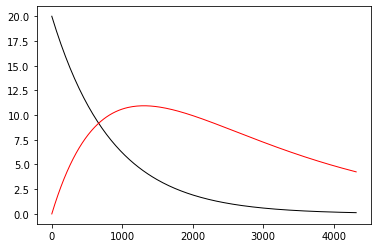

In [3]:
toto = Model()
toto.run(10)
toto.plot_simulation()

### Localisation et caractérisation du maximum de sulfate

In [5]:
position_max, concentration_max = toto.maximum_of_so4()
print((position_max, concentration_max))

(1317.5999999999995, 10.94140841016373)


# Questions complémentaires

## 1. Schéma numérique

1. Remplacer le schéma d'Euler par un schéma de Runge Kutta d'ordre 4.

## 2. Représentation et quantification d'incertitudes

1. Il y a des incertitudes sur le vent et sur la concentration initiale : V = 5 + ou - 0.5 m.s-1 ; C0 = 20 +- 5. Quelle est l'incertitude resultante sur la position du maximum de sulfate ?
2. Un detecteur de sulfate est installe a 1400 km de la zone d emission et donne l'alarme lorsque la concentration depasse 12. Quelle est la probabilité de declenchement ?
3. Des mesures montrent que le max de sulfate se trouve à 1280 +-40 km de la zone d emission. Que peut-on en deduire pour V et C0 ? 